### Major project Develop a Model that classifies Credit Cartd Fraud or not By Gaurav Vashist

In [10]:
# import the important libraries.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



## Import the Data.

In [41]:
df= pd.read_csv("D:/GAURAV NOTES/notes 1965/A.N.D projects/credit card fraud/card_transdata.csv")
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [12]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## Data Preprocessing.

In [14]:
df.describe()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [17]:
# Handle missing values (if any)
df = df.dropna()  # Drop rows with missing values
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [18]:
# Check for missing values in each column
missing_values = df.isnull().sum()

In [19]:
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


### EDA ,feature selection and engineering

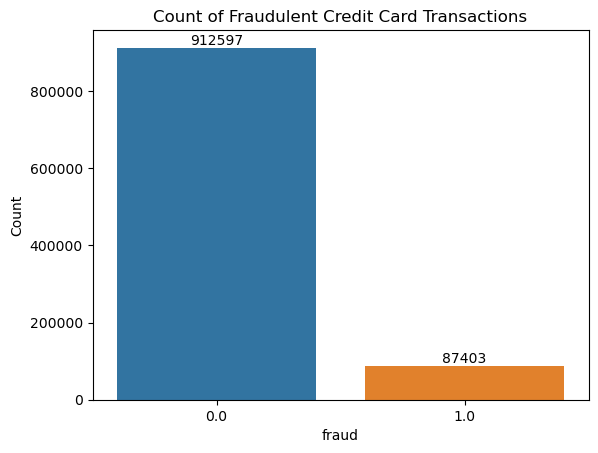

In [21]:
# see distribution of Target class.

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'fraud_label' is the target variable
fraud_counts = df['fraud'].value_counts()

# Bar plot
sns.countplot(x='fraud', data=df)
plt.title('Count of Fraudulent Credit Card Transactions')
plt.xlabel('fraud')
plt.ylabel('Count')

# Display the counts on top of the bars
for index, value in enumerate(fraud_counts):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()


In [23]:

fraud = df[df['fraud'] == 1]
real = df[df['fraud'] == 0]

# Calculate the percentages
total_transactions = len(df)
percent_real = len(real) / total_transactions * 100
percent_fraud = len(fraud) / total_transactions * 100

# Display the percentages
print(f"Percentage of Real Transactions: {percent_real:.2f}%")
print(f"Percentage of Fraud Transactions: {percent_fraud:.2f}%")



Percentage of Real Transactions: 91.26%
Percentage of Fraud Transactions: 8.74%


# #heat map for this

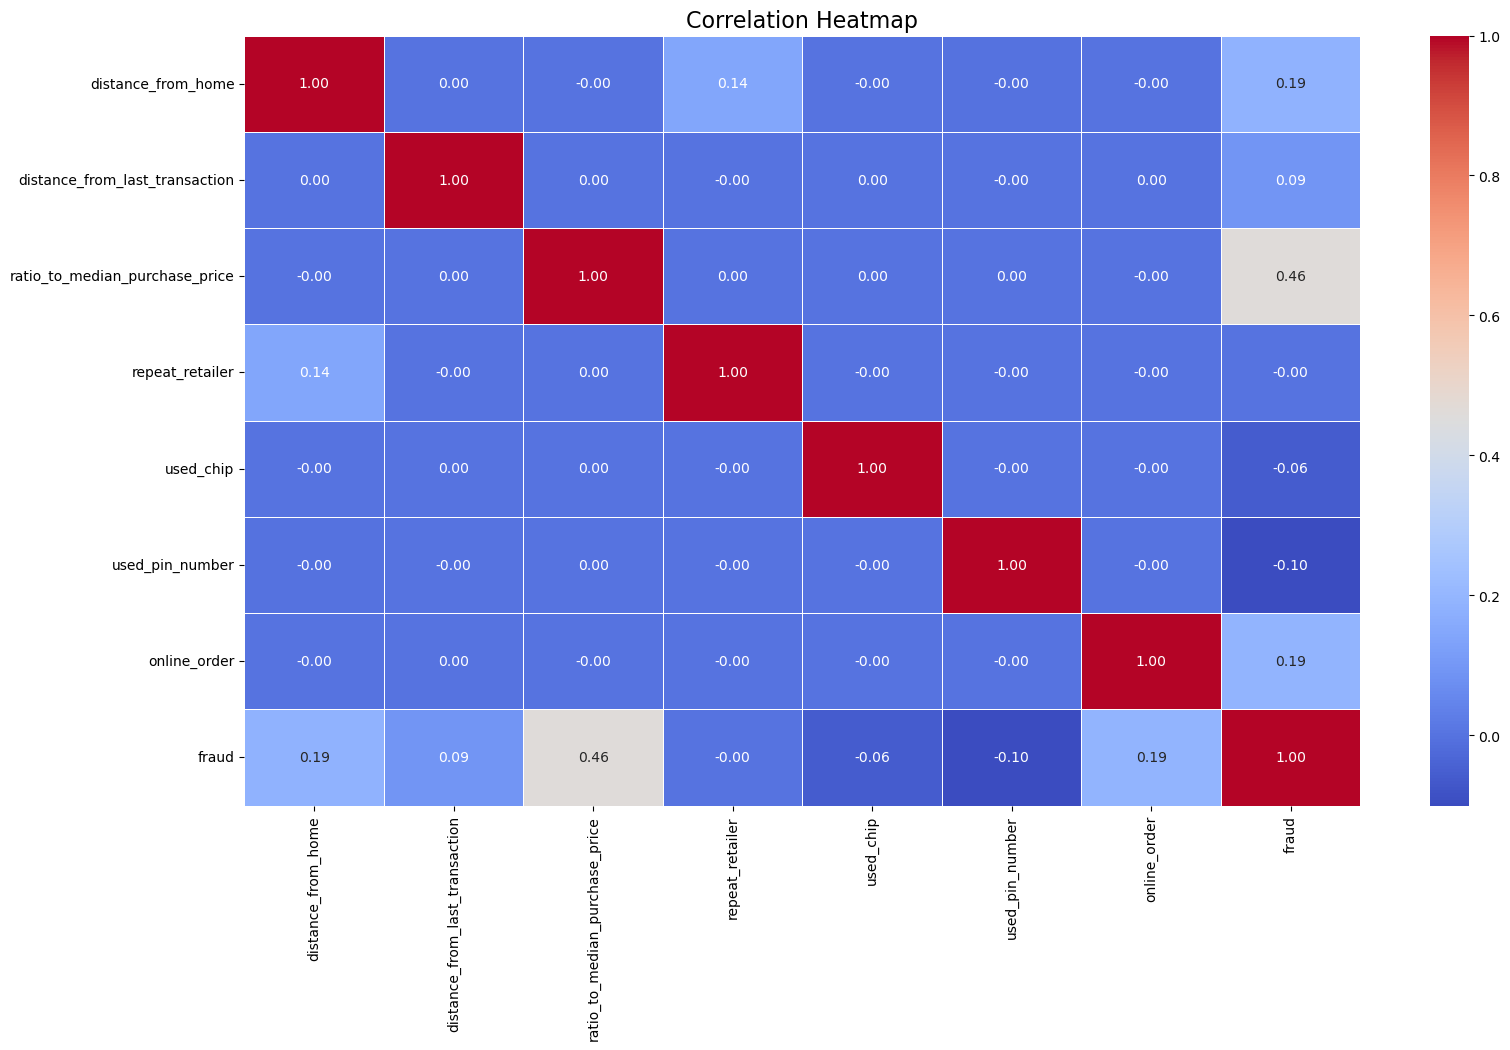

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 10))

# Create a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
plt.show()


## distribution of transaction amount.

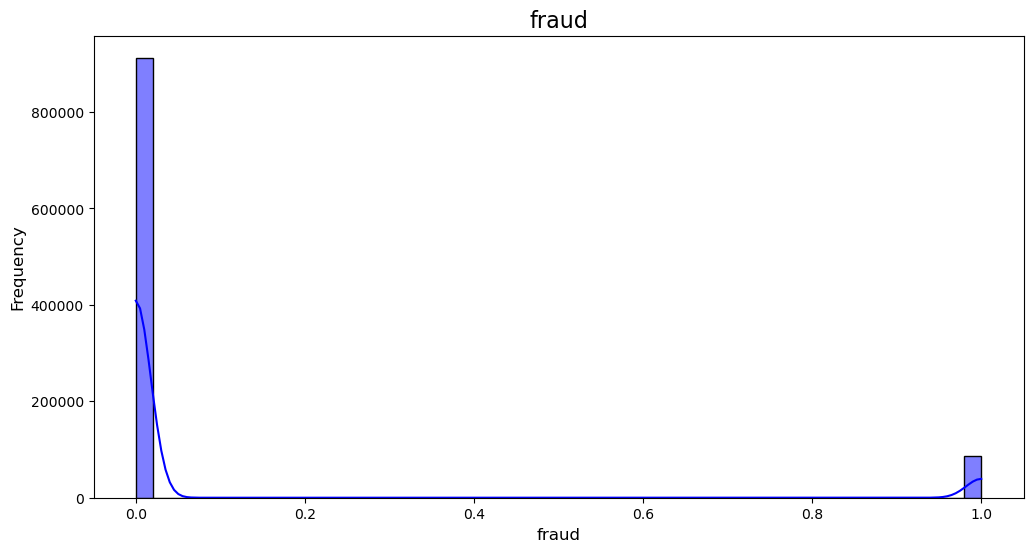

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'transaction_amount' is the column name
plt.figure(figsize=(12, 6))

# Create a histogram
sns.histplot(df['fraud'], bins=50, kde=True, color='blue')

# Add title and labels
plt.title('fraud', fontsize=16)
plt.xlabel('fraud', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


### perform the data spliting.

In [25]:
from sklearn.model_selection import train_test_split

# Assuming X contains features and y contains the target variable
X = df.drop('fraud', axis=1)  # Adjust the column name if needed
y = df['fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set - Features:", X_train.shape, "Labels:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Labels:", y_test.shape)


Training set - Features: (800000, 7) Labels: (800000,)
Testing set - Features: (200000, 7) Labels: (200000,)


## Model selection and training

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[181280   1277]
 [  6994  10449]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.89      0.60      0.72     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.95    200000

Accuracy: 0.958645


## final graphical representation

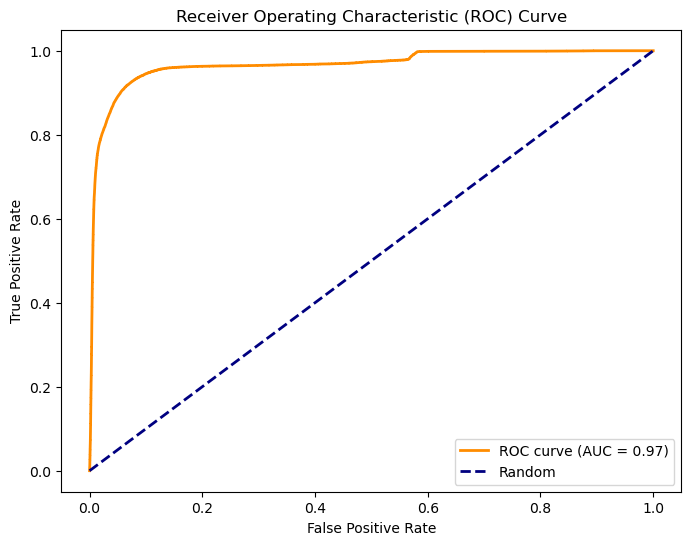

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob = lr_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


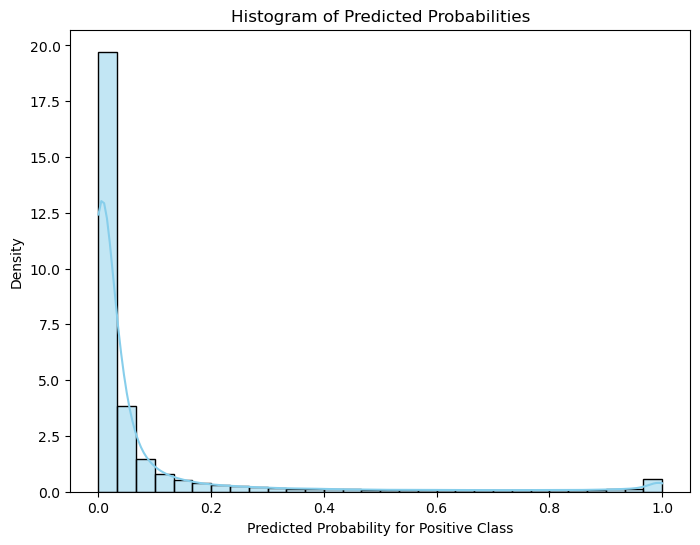

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get predicted probabilities for the positive class
y_prob = lr_model.predict_proba(X_test)[:, 1]

# Plot histogram of predicted probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_prob, bins=30, kde=True, color='skyblue', stat='density')
plt.xlabel('Predicted Probability for Positive Class')
plt.ylabel('Density')
plt.title('Histogram of Predicted Probabilities')
plt.show()
